In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/ex7data.mat')
x = mat['X']
#y = mat['y']
y = np.ravel(mat['y'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y,random_state=1)
print(y.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ex7data.mat'

In [ ]:
x.shape

(5000, 400)

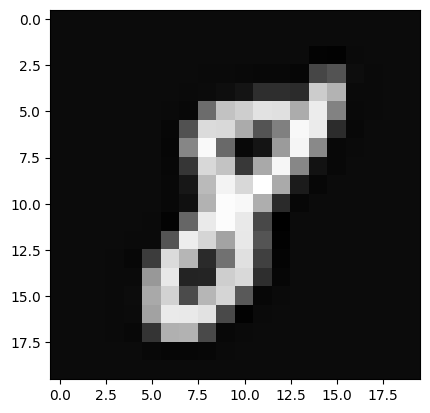

In [ ]:
x_show = np.reshape(x[4000,:],(20,20))
plt.imshow(x_show.T,cmap='gray')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y,random_state=1)
clf = MLPClassifier(hidden_layer_sizes = (100,50,), activation = 'logistic', learning_rate_init = 0.1, shuffle = True, solver = 'sgd', random_state=1, max_iter=300, alpha = 0.1).fit(X_train, y_train)

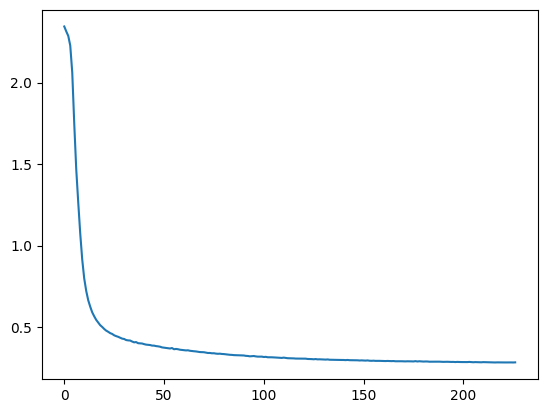

In [ ]:
plt.plot(clf.loss_curve_)

In [ ]:
import keras
from keras import layers
from keras import ops
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical
from keras import regularizers

mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/ex7data.mat')
x = mat['X']
y = np.ravel(mat['y'])
X, X_test, Y, y_test = train_test_split(x, y, test_size = 0.3, stratify=y,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1, stratify=Y,random_state=1)
y_train[y_train==10] = 0
y_val[y_val==10] = 0
y_test[y_test==10] = 0
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
model = keras.Sequential(
    [
        keras.Input(shape=(x.shape[1],)),
        layers.Dense(100, activation="sigmoid", name="layer1"),
        layers.Dense(50, activation="sigmoid", name="layer2"),
        layers.Dense(10, activation="softmax", name="layer3"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy'],
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile="auto",
    auto_scale_loss=True,
)
model.fit(
    x=X_train,
    y=Y_train,
    batch_size=1000,
    epochs=1000,
    verbose="auto",
    validation_data = (X_val,Y_val),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 549ms/step - accuracy: 0.1008 - loss: 0.4735 - val_accuracy: 0.1000 - val_loss: 0.3251
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1474 - loss: 0.3230 - val_accuracy: 0.1114 - val_loss: 0.3215
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1838 - loss: 0.3200 - val_accuracy: 0.1000 - val_loss: 0.3170
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2415 - loss: 0.3143 - val_accuracy: 0.2143 - val_loss: 0.3083
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3389 - loss: 0.3056 - val_accuracy: 0.2657 - val_loss: 0.2975
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3973 - loss: 0.2953 - val_accuracy: 0.4943 - val_loss: 0.2850
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5370 - loss: 0.2814 - val_accuracy: 0.4971 - val_loss: 0.2662
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5311 - loss: 0.2637 - val_accuracy: 0.4600 - 

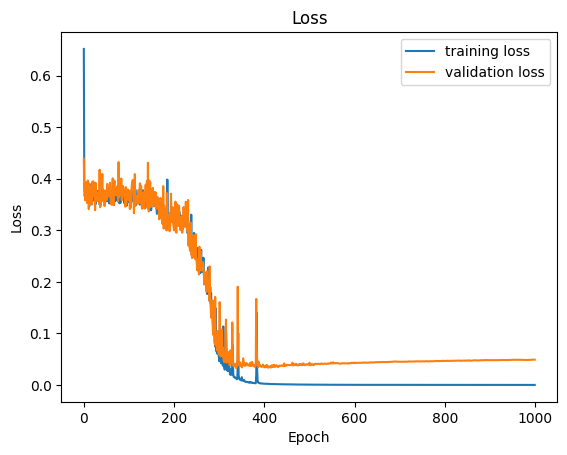

In [ ]:
fig = plt.figure()
numOfEpoch = 1000
plt.plot(np.arange(0, numOfEpoch), model.history.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), model.history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
loss_test, acc_test = model.evaluate(
    x=X_test,
    y=Y_test,
    batch_size=X_test.shape[0],
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False
)
print(acc_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9140 - loss: 0.0575
0.9139999747276306


In [ ]:
print(X_train.shape)

(3150, 400)


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
x = mat['X'].astype('float32')
y = np.ravel(mat['y'])
X, X_test, Y, y_test = train_test_split(x, y, test_size = 0.3, stratify=y,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1, stratify=Y,random_state=1)
y_train[y_train==10] = 0
y_val[y_val==10] = 0
y_test[y_test==10] = 0
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
class Dataset:
  def __init__(self, data, label):
    self.data = data
    self.label = label
  def __len__(self):
    return len(self.data)
  def __getitem__(self, i):
    image = self.data[i,:]
    label = self.label[i,:]
    return image, label
class NeuralNetwork(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear_sigmoid_stack = nn.Sequential(
          nn.Linear(X_train.shape[1], 100),
          nn.Sigmoid(),
          nn.Linear(100, 50),
          nn.Sigmoid(),
          nn.Linear(50, 10),
      )

  def forward(self, x):
      logits = self.linear_sigmoid_stack(x)
      return logits
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
      pred = model(X)
      loss = loss_fn(pred, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      if batch % 100 == 0:
        loss, current = loss.item(), batch * batch_size + len(X)
        print(f"loss: {loss:>7f}")
  return loss.item()
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss
model_tor = NeuralNetwork()
learning_rate = 1e-1
epochs = 1000
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_tor.parameters(), lr=learning_rate)
training_data = Dataset(X_train,Y_train)
train_dataloader = DataLoader(training_data, batch_size=315, shuffle=True)
val_data = Dataset(X_val,Y_val)
val_dataloader = DataLoader(val_data, batch_size=10, shuffle=True)
loss_tr = np.zeros(epochs)
loss_val = np.zeros(epochs)
for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  loss_tr[t] = train_loop(train_dataloader, model_tor, loss_fn, optimizer)
  loss_val[t] = test_loop(val_dataloader, model_tor, loss_fn)
print("Done!")


Streaming output truncated to the last 5000 lines.

Epoch 168
-------------------------------
loss: 0.826986
Test Error: 
 Accuracy: 76.6%, Avg loss: 0.846002 

Epoch 169
-------------------------------
loss: 0.859859
Test Error: 
 Accuracy: 76.6%, Avg loss: 0.839342 

Epoch 170
-------------------------------
loss: 0.835197
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.831876 

Epoch 171
-------------------------------
loss: 0.860517
Test Error: 
 Accuracy: 77.1%, Avg loss: 0.825384 

Epoch 172
-------------------------------
loss: 0.791447
Test Error: 
 Accuracy: 77.1%, Avg loss: 0.819257 

Epoch 173
-------------------------------
loss: 0.754760
Test Error: 
 Accuracy: 77.7%, Avg loss: 0.812751 

Epoch 174
-------------------------------
loss: 0.763865
Test Error: 
 Accuracy: 78.3%, Avg loss: 0.806232 

Epoch 175
-------------------------------
loss: 0.793324
Test Error: 
 Accuracy: 78.0%, Avg loss: 0.800016 

Epoch 176
-------------------------------
loss: 0.853156
Test Error: 
 Accur

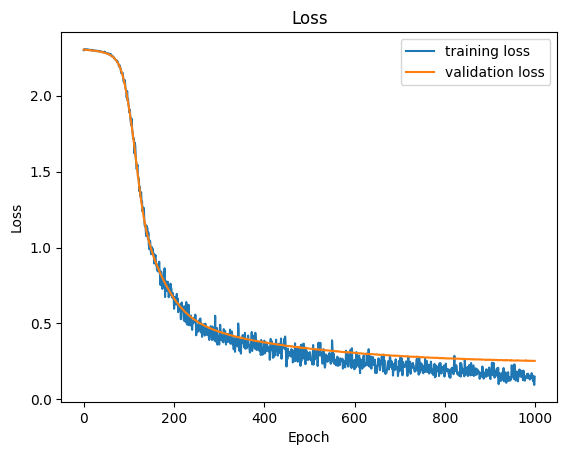

In [ ]:
fig = plt.figure()
numOfEpoch = 1000
plt.plot(np.arange(0, numOfEpoch), loss_tr, label='training loss')
plt.plot(np.arange(0, numOfEpoch), loss_val, label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
pre_test = model_tor(torch.Tensor(X_test))
print("Accurancy:",100*(pre_test.argmax(1)==torch.Tensor(Y_test.argmax(1))).type(torch.float).sum().item()/len(Y_test))

Accurancy: 92.06666666666666
